# Subject Classification from Text Based Questions

Here we are going to perform text classification using Hugging face pre-trained model and Support Vector Machine

# This Project is based on Natural Language Processing
**What is natural language processing?**

Natural language processing (NLP) refers to the branch of computer science—and more specifically, the branch of artificial intelligence or AI—concerned with giving computers the ability to understand text and spoken words in much the same way human beings can.

**Some famous NLP tasks and applications:**

1. **Speech recognition**: also called speech-to-text, is the task of reliably converting voice data into text data.
2. **Natural language generation**: the task of putting structured information into human language.
3. **Sentiment analysis** attempts to extract subjective qualities—attitudes, emotions, sarcasm, confusion, suspicion—from text.
4. **Spam detection**: spam detection technologies use NLP's text classification capabilities to scan emails for language that often indicates spam or phishing.
5. **Virtual agents and chatbots**: Virtual agents such as Apple's Siri and Amazon's Alexa use speech recognition to recognize patterns in voice commands and natural language generation to respond with appropriate action or helpful comments.

In this project, we will use text analysis which is similar to sentiment analysis to detect the emotions of a person after watching a movie, let's see how.

# Context

In India, every year lacs of students sit for competitive examinations like JEE Advanced, JEE Mains, NEET, etc. These exams are said to be the gateway to get admission into India's premier Institutes such as IITs, NITs, AIIMS, etc.

The **dataset** we are using **contains** **questions/doubts** raised by students preparing for such examinations.

We are going to use this dataset to make a machine learning model that can **classify a paricular question** into one of these 4 subjects: **Physics, Chemistry, Biology, Mathematics**

# Dataset Description


Our dataset contains two columns:

**eng**: Questions in english language
**Subject** : Subject name of which that question belongs

**Dataset link:** https://www.kaggle.com/datasets/mrutyunjaybiswal/iitjee-neet-aims-students-questions-data

In [1]:
import pandas as pd

#creating a dataframe for our dataset "subject_questions"
subject_df = pd.read_csv("/kaggle/input/iitjee-neet-aims-students-questions-data/subjects-questions.csv")

#printing first 5 rows of our dataset/dataframe
subject_df.head()

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics


# Exploratory Data Analysis

The main purpose of EDA is to help look at data before making any assumptions. It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

In [2]:
#info() function helps us to see if there are any null values in our dataset
#it also describes the datatype of each column
print(subject_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122519 entries, 0 to 122518
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   eng      122519 non-null  object
 1   Subject  122519 non-null  object
dtypes: object(2)
memory usage: 1.9+ MB
None


In [3]:
#our dataset contains 4 diff subjects,
#let's count no. of rows containing each type of subjects
subject_count = subject_df['Subject'].value_counts()
print(subject_count)

Physics      38438
Chemistry    37767
Maths        33190
Biology      13124
Name: Subject, dtype: int64


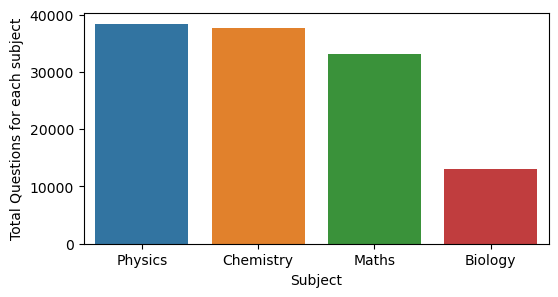

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


#plotting total subject cateogory count for each category
plt.figure(figsize = (6,3))
ax = sns.barplot(x= subject_count.keys(), y = subject_count)
plt.xlabel("Subject")
plt.ylabel("Total Questions for each subject")
plt.show()

# Data Pre-Processing

1. **Data Cleaning:**
* Expanding contractions such as I'll to I will etc. 
* Removing punctuations other than space.
* Tokenization to convert sentences into words.
* Removing stop words like if, or, but etc.
* Removing single letters from questions like option headers (a,b,c) etc.
* Lemmatization on questions: Converting words in their root form in the same language, ex: conversion of connected to connect.

2. **Creaing a balanced dataset**

3. **Splitting dataset into training and test set**

4. **Vectorizing our dataset**


In [5]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import contractions

#Expanding contractions such as I'll to I will etc.
def expand_contractions(s):
    return contractions.fix(s)


In [7]:
import spacy
nlp = spacy.load('en_core_web_sm')
 
# Create a Doc object
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    # Create list of tokens from given string
    tokens = []
    for token in doc:
        tokens.append(token)
 
    lemmatized_sentence = " ".join([token.lemma_ for token in doc])
    return lemmatized_sentence 

In [8]:
import re
from nltk.corpus import stopwords

def clean_data(clean_sentence):    
    
    clean_sentence = clean_sentence.lower()  #converting to lowercase
    
    clean_sentence = re.sub(r'[^\w\s]', '', clean_sentence)  #removing punctuations like "/", ";" "[", "]" "=", "#" etc.       
    
    clean_sentence = re.sub(r'\s', ' ', clean_sentence) #removing extra spaces
    
    clean_sentence = expand_contractions(clean_sentence)
    
    clean_sentence = clean_sentence.split()  #tokenization: splitting sentence into words
    
    stop_words = set(stopwords.words('english'))
    clean_lst = []  #removing stop words like if, but, or etc. and removing characters of length 1
    for word in clean_sentence:
        if (word not in stop_words):
            if(len(word) != 1):
                clean_lst.append(word)
    
    return lemmatize_sentence(' '.join(clean_lst))
    
#example    
sentence = subject_df['eng'][84]
print(sentence)
sentence = clean_data(sentence)
print("\n\n")
print(sentence)

A car is moving on a straight road. The
velocity of the car varies with time as shown in figure. Initially \( (a t t=0), \) the
car was at \( x=0, \) where, \( x \) is the
position of the car at any time \( t \)
Average speed from \( t=0 \) to \( t=70 s \) wil
be:
A \( \cdot \frac{16}{7} m / \)
в. \( \frac{24}{7} m / \)
c. \( \frac{20}{7} m / \)
\( D \)



car move straight road velocity car vary time show figure initially t0 car x0 position car time average speed t0 t70 wil cdot frac167 frac247 frac207


                                              Questions    Subject
0     Construct a triangle \( X Y Z \) in which\n\( ...      Maths
1     The correct order of decreasing polarity\n¡s:\...  Chemistry
2     One of the method for purification of water is...    Biology
3     The relative velocity of \( B \) as seen from\...    Physics
4     The spin-only magnetic moment of sodium nitrop...  Chemistry
...                                                 ...        ...
5995  A block attached to a spring, pulled by a cons...    Physics
5996  The secretion of adrenal gland is known\nas\nA...    Biology
5997  If the angle of incidence is \( 50^{\circ}, \)...    Physics
5998  Estuaries are considered as nutrient\ntrap due...    Biology
5999  Looming' in polar region\n\( A \cdot \) Is an ...    Physics

[6000 rows x 2 columns]


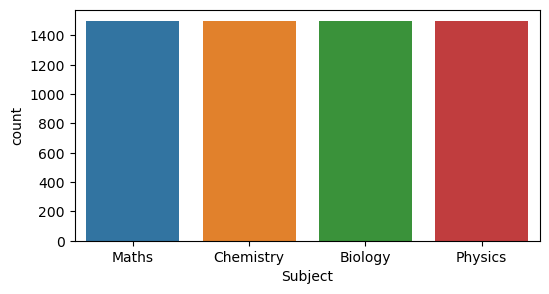

In [9]:
'''
Our dataset is huge, containing more than 30k questions of each subject except biology
Physics      38438
Chemistry    37767
Maths        33190
Biology      13124

using this dataset to create a model will take huge time and will not be trained as good for biology
as for other subjects

that's why, we need to create a smaller and a balanced dataset.
'''

df_physics = subject_df[subject_df['Subject']=='Physics'].sample(n = 1500)
df_chem = subject_df[subject_df['Subject']=='Chemistry'].sample(n = 1500)
df_math = subject_df[subject_df['Subject']=='Maths'].sample(n = 1500)
df_bio = subject_df[subject_df['Subject']=='Biology'].sample(n = 1500)

balanced_df = pd.concat([df_physics, df_chem, df_math, df_bio])

balanced_df = balanced_df.sample(frac = 1)

balanced_df.reset_index(drop=True, inplace=True)

subject_df_clean = balanced_df.copy()
subject_df_clean.rename(columns = {'eng':'Questions'}, inplace = True)

print(subject_df_clean)

plt.figure(figsize = (6,3))
sns.countplot(x='Subject', data = balanced_df, order = balanced_df['Subject'].value_counts().index)
plt.show()

In [10]:
#perform data cleaning on the whole balanced dataset
subject_df_clean['Questions'] = subject_df_clean['Questions'].apply(lambda x :  clean_data(x))

# delete duplicates
subject_df_clean.drop_duplicates(subset='Questions', inplace=True)
subject_df_clean.reset_index(drop=True, inplace=True)

# delete small sentence
subject_df_clean = subject_df_clean.loc[subject_df_clean['Questions'].apply(lambda x: len(x) >= 3)]

print(subject_df_clean)

                                              Questions    Subject
0              construct triangle y5 z55 angle z100circ      Maths
1     correct order decrease polarity mathbfa cdot f...  Chemistry
2     one method purification water sedimentation tr...    Biology
3     relative velocity see mathbfa cdot8 sqrt2 hati...    Physics
4     spinonly magnetic moment sodium nitroprusside ...  Chemistry
...                                                 ...        ...
5990  block attach spring pull constant horizontal f...    Physics
5991  secretion adrenal gland know thyroxin adrenali...    Biology
5992  angle incidence 50circ calculate angle inciden...    Physics
5993  estuary consider nutrient trap due mix river s...    Biology
5994  loom polar region cdot optical illusion arise ...    Physics

[5994 rows x 2 columns]


# Splitting dataset into train and test set using train_test_split from sklear.model_selection

In [11]:
#splitting dataset into training and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(subject_df_clean, test_size=0.33)

train_x, train_y = train['Questions'], train['Subject']
test_x, test_y = test['Questions'], test['Subject']

# TF-IDF Vectorizer
Term frequency-inverse document frequency is a text vectorizer that **transforms the text into a usable vector.**

The term frequency is the number of occurrences of a specific term in a document.
Document frequency is the number of documents containing a specific term. 

Inverse document frequency (IDF) is the weight of a term, it aims to reduce the weight of a term if the term’s occurrences are scattered throughout all the documents.

When the number of DF is equal to n which means that the term appears in all documents, the IDF will be zero, when in doubt just put this term in the stopword list because it doesn't provide much information.

The TF-IDF score as the name suggests is just a multiplication of the term frequency matrix with its IDF.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

test_x_vector = tfidf.transform(test_x)

# Training and Classification using Support Vector Machine (SVM)

The goal of the SVM algorithm is to create the **best line or decision boundary** that can **segregate n-dimensional space** into **classes** so that we can easily put the new data point in the correct category in the future. This **best decision boundary** is called a **hyperplane**.

In [13]:
from sklearn.svm import SVC
svc = SVC(kernel= 'linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

# Classification Report for SVM

In [14]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            svc.predict(test_x_vector)))

              precision    recall  f1-score   support

     Biology       0.88      0.90      0.89       501
   Chemistry       0.86      0.87      0.87       529
       Maths       0.93      0.93      0.93       481
     Physics       0.88      0.85      0.86       468

    accuracy                           0.89      1979
   macro avg       0.89      0.89      0.89      1979
weighted avg       0.89      0.89      0.89      1979



# Text Classification using tensorflow and transformers

In [15]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from transformers import AutoTokenizer
from tqdm.auto import tqdm

# A little bit about Hugging Face pre-trained model for text classification 

BERT, DistilBert, RoBerta etc are designed to help computers understand the meaning of ambiguous language in text by using surrounding text to establish context. The BERT framework was pre-trained using text from Wikipedia and can be fine-tuned with question and answer datasets.


In [16]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [17]:
df = subject_df_clean.copy()
print(df)

                                              Questions    Subject
0              construct triangle y5 z55 angle z100circ      Maths
1     correct order decrease polarity mathbfa cdot f...  Chemistry
2     one method purification water sedimentation tr...    Biology
3     relative velocity see mathbfa cdot8 sqrt2 hati...    Physics
4     spinonly magnetic moment sodium nitroprusside ...  Chemistry
...                                                 ...        ...
5990  block attach spring pull constant horizontal f...    Physics
5991  secretion adrenal gland know thyroxin adrenali...    Biology
5992  angle incidence 50circ calculate angle inciden...    Physics
5993  estuary consider nutrient trap due mix river s...    Biology
5994  loom polar region cdot optical illusion arise ...    Physics

[5994 rows x 2 columns]


In [18]:
#splitting dataset into training and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state = 30)

train_x, train_y = train['Questions'], train['Subject']
test_x, test_y = test['Questions'], test['Subject']

# Sentence Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data(a sentence) and breaking it into understandable parts(words).

In [19]:
import numpy as np

In [20]:
def tokenize_sentence(data):
    ids = np.zeros((len(data), 128))
    masks = np.zeros((len(data), 128))
    
    for i, text in tqdm(enumerate(data)):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length = 128,
            truncation = True,
            padding = 'max_length',
            add_special_tokens = True,
            return_tensors = 'tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

train_x_input_ids, train_x_attn_masks = tokenize_sentence(df['Questions'])
valid_x_input_ids, valid_x_attn_masks = tokenize_sentence(train_x)
test_x_input_ids, test_x_attn_masks = tokenize_sentence(test_x)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

# One Hot Encoding on our output values(categorical data)
One-hot encoding is a common method for dealing with categorical data in machine learning. Categorical variables must be changed in the pre-processing section since machine learning models require numeric input variables.

In [21]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

encoder = OneHotEncoder()

In [22]:
#category to binary

train_y_encoded = encoder.fit_transform(np.array(df['Subject']).reshape(-1, 1)).toarray()
valid_y_encoded = encoder.fit_transform(np.array(train_y).reshape(-1, 1)).toarray()
test_y_encoded = encoder.fit_transform(np.array(test_y).reshape(-1, 1)).toarray()

# binary to category for labeling in performance matrix
labels = np.unique(encoder.inverse_transform(train_y_encoded))


# Model formation using DistilBert 

In [23]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
from transformers import TextClassificationPipeline

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [24]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels = 4)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier', 'pre_classifier', 'dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use i

In [25]:
input_ids = tf.keras.layers.Input(shape = (128,), name = 'input_ids', dtype = 'int32')
attention_mask = tf.keras.layers.Input(shape = (128,), name = 'attention_mask', dtype = 'int32')

In [26]:
bert_embds = model([input_ids, attention_mask])[0]

dense_1 = tf.keras.layers.Dense(128, activation = 'relu', name = 'intermediate_layer')(bert_embds)
dropout_1 = tf.keras.layers.Dropout(0.5)(dense_1)

dense_2 = tf.keras.layers.Dense(64, activation='relu')(dense_1)
dropout_2 = tf.keras.layers.Dropout(0.5)(dense_2)

output_layer = tf.keras.layers.Dense(4, activation = 'softmax', name = 'output_layer')(dropout_2)

model = tf.keras.Model(inputs = [input_ids, attention_mask], outputs = output_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_distil_bert_for_sequence_cl  TFSequenceClassifie  66956548   ['input_ids[0][0]',              
 assification (TFDistilBertForS  rOutput(loss=None,               'attention_mask[0][0]']         
 equenceClassification)         logits=(None, 4),                                                 
                                 hidden_states=None                                           

In [27]:
optim = tf.keras.optimizers.legacy.Adam(learning_rate = 1e-5, decay = 1e-7)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [28]:
model.compile(optimizer = optim, loss = loss_func, metrics = [acc])

# Model training

We're training our model using 67% of our balanced data
Here we are performing 2 epochs, 
we can perform more epochs to generate a model with better accuracy

In [29]:
hist = model.fit(
    [train_x_input_ids, train_x_attn_masks], 
    train_y_encoded,
    validation_data = ([valid_x_input_ids, valid_x_attn_masks], valid_y_encoded),
    epochs = 2,
    batch_size = 32
)

Epoch 1/2
188/188 [==============================] - 2506s 13s/step - loss: 1.2961 - accuracy: 0.4314 - val_loss: 1.1014 - val_accuracy: 0.7604
Epoch 2/2
188/188 [==============================] - 2487s 13s/step - loss: 0.9930 - accuracy: 0.6476 - val_loss: 0.7049 - val_accuracy: 0.9188


# Prediction

In [30]:
result = model.predict([test_x_input_ids, test_x_attn_masks])
y_pred =  np.zeros_like(result)
y_pred[np.arange(len(y_pred)), result.argmax(1)] = 1

62/62 [==============================] - 210s 3s/step


# Performance evaluation

In [31]:
from sklearn.metrics import classification_report
print(classification_report(test_y_encoded.argmax(1),
                            y_pred.argmax(1), target_names=[str(l) for l in labels]))

              precision    recall  f1-score   support

     Biology       0.95      0.95      0.95       480
   Chemistry       0.92      0.85      0.88       488
       Maths       0.94      0.97      0.95       520
     Physics       0.90      0.93      0.92       491

    accuracy                           0.93      1979
   macro avg       0.93      0.93      0.93      1979
weighted avg       0.93      0.93      0.93      1979



In [32]:
pred_r = [labels[list(i).index(max(i))] for i in result]

df_pred = pd.DataFrame()

df_pred['Questions'] = test_x
df_pred['actual_subject'] = test_y
df_pred['predicted_subject'] = pred_r

df_pred.reset_index(drop = True, inplace = True)

df_pred.head(15)

,Questions,actual_subject,predicted_subject
0,dentify process replication fertilisation bina...,Biology,Biology
1,ball thrown vertically go certain height retur...,Physics,Physics
2,sl unit temperature mathbfa cdot circ cdoto,Chemistry,Physics
3,particulate gaseous pollutant along harmless g...,Biology,Physics
4,metal chlorine combine different proportion fo...,Chemistry,Chemistry
5,find wrong statement give statement oxalic aci...,Chemistry,Chemistry
6,tan 1leftfrac5x6 x25 x3right,Maths,Maths
7,assertion turbulence always dissipative reason...,Physics,Physics
8,circuit show figure direction magnitude force ...,Physics,Physics
9,follow statement false range rigidly define ra...,Maths,Maths


In [33]:
#No. of correct predictions:

count = 0
for i in range(len(test_y)):
    if(list(test_y)[i] == pred_r[i]):
        count += 1
print("Total no. of predictions: ", len(pred_r))
print("No. of correct predictions: ", count)
print("No. of incorrect predictions: ", len(pred_r)-count)
print("Accuracy: ", count*100/len(pred_r))

Total no. of predictions:  1979
No. of correct predictions:  1833
No. of incorrect predictions:  146
Accuracy:  92.62253663466397
